#### Часть 1. EDA
Целевая переменная - диагноз, является ли новообразование злокачественным или нет.

### 1. 
Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('data.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
dataset = dataset.drop(['Unnamed: 32'], axis=1)

In [5]:
#проверка таргет столбца
dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### 2. 
Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [6]:
# Вычислите базовые статистики для каждого столбца
describe = dataset.describe()
describe

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#кодирование категориальных переменных в данных
from category_encoders import OrdinalEncoder, OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(dataset[['diagnosis']]).head()

enc = OrdinalEncoder()
enc.fit(dataset[['diagnosis']])
dataset[['diagnosis']] = enc.transform(dataset[['diagnosis']])

In [9]:
#проверка таргет столбца
dataset['diagnosis'].value_counts()

diagnosis
2    357
1    212
Name: count, dtype: int64

In [13]:
malignant = dataset[dataset['diagnosis'] == 1]
benign = dataset[dataset['diagnosis'] == 2]

### 3. 
Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

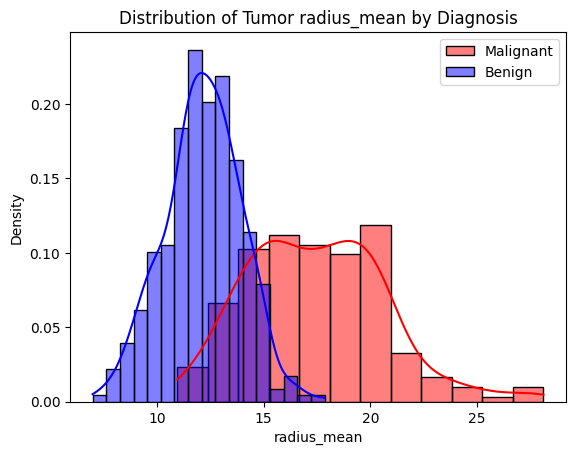

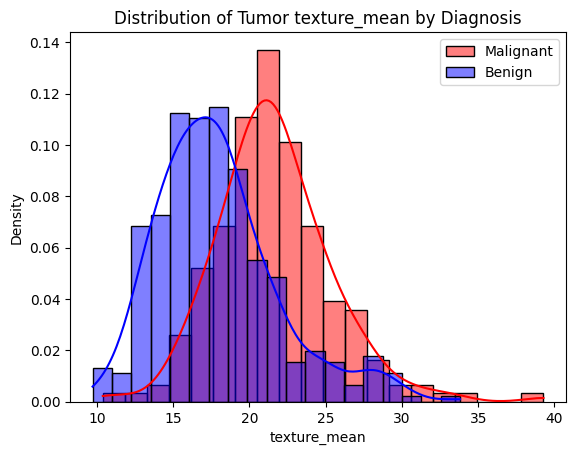

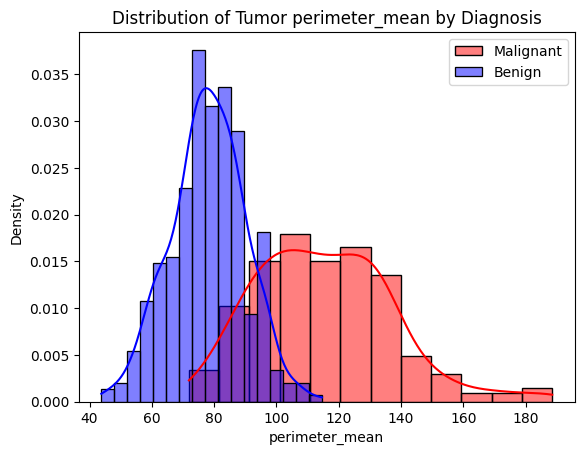

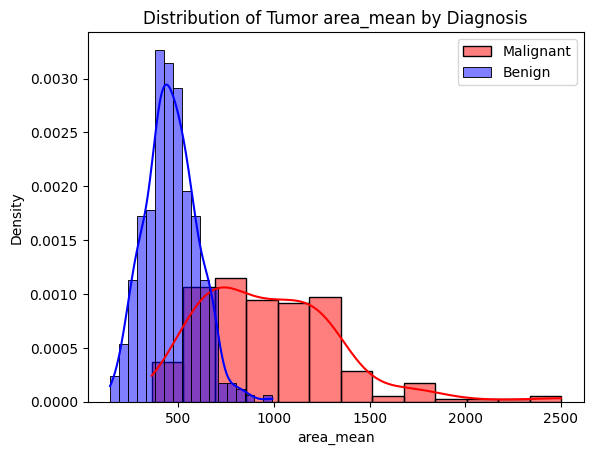

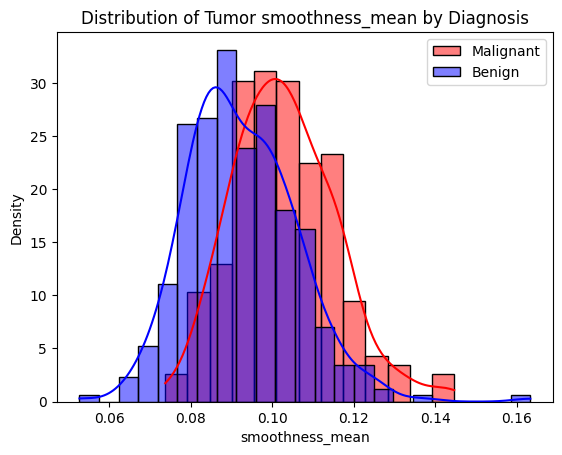

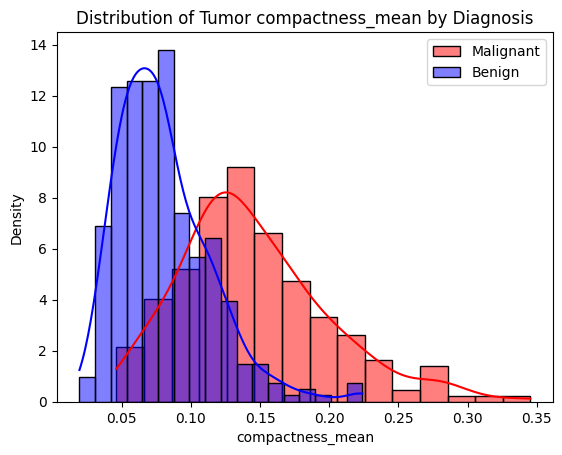

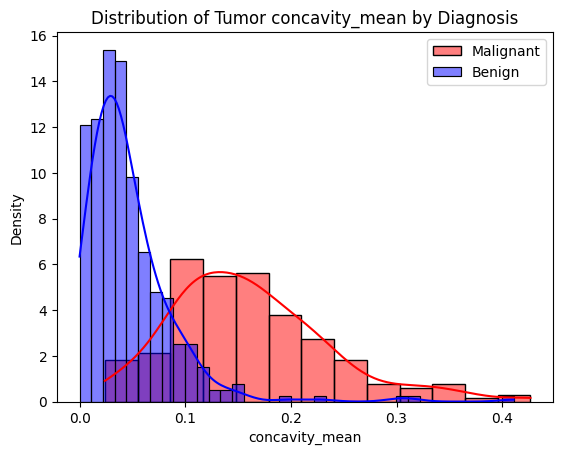

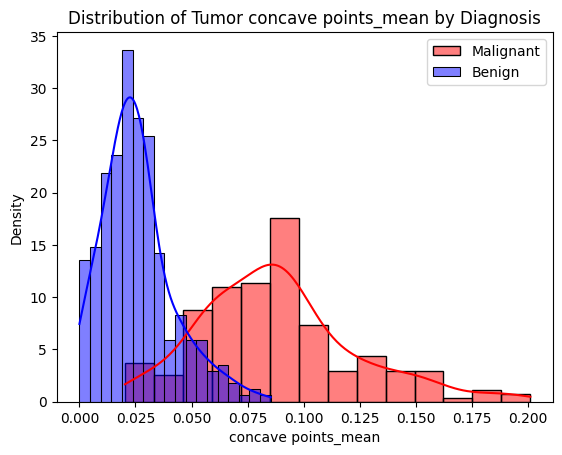

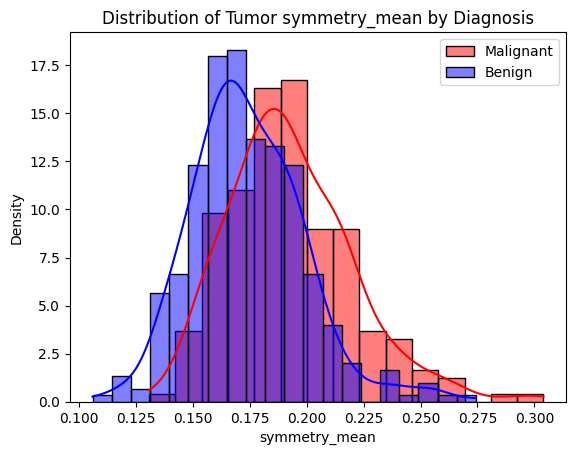

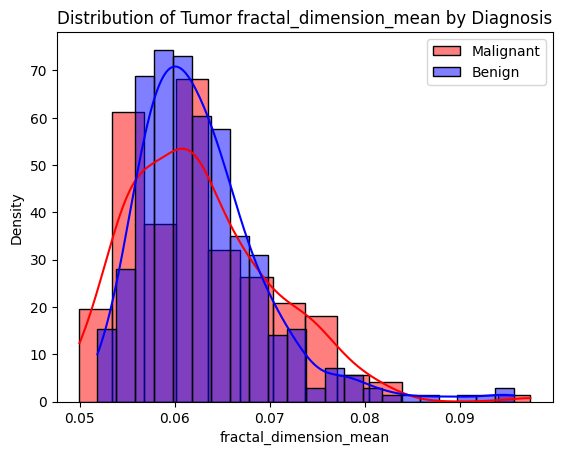

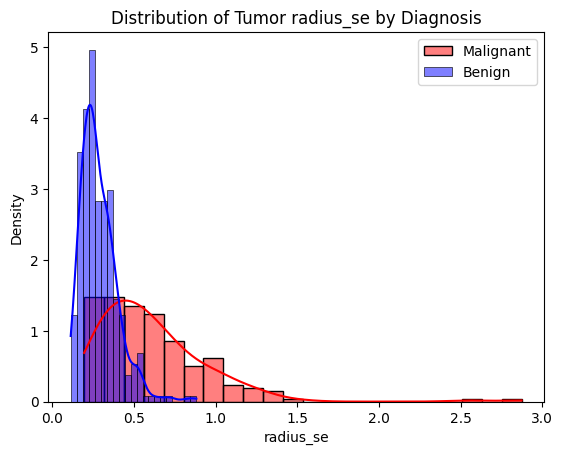

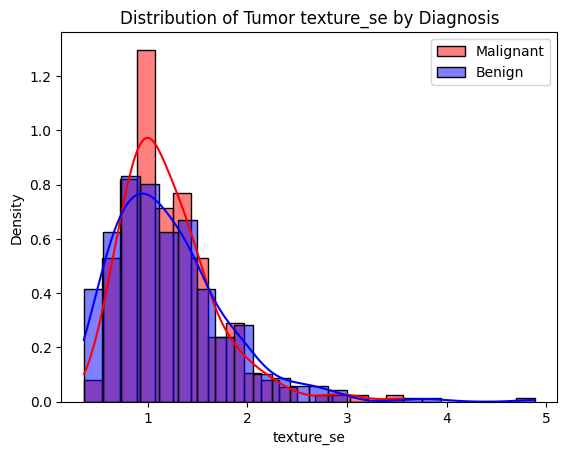

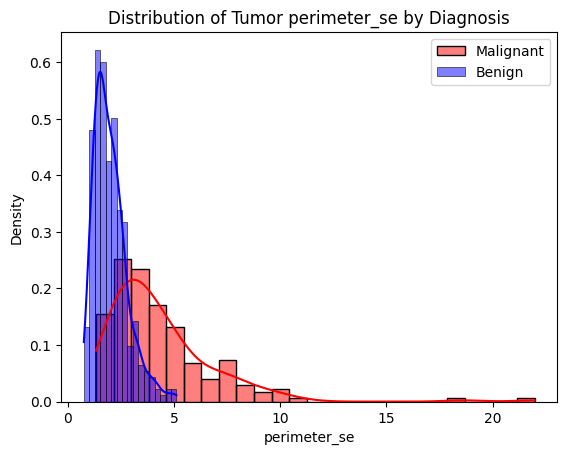

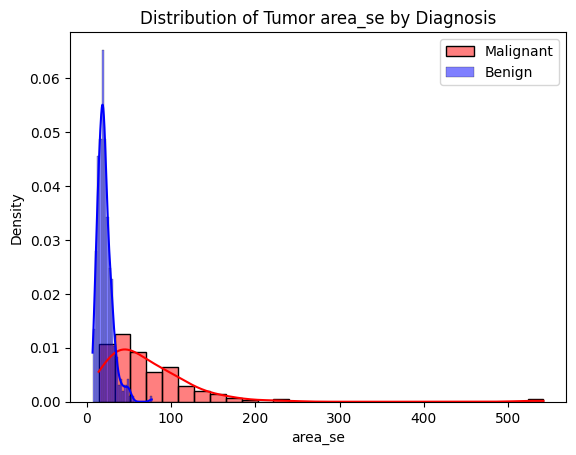

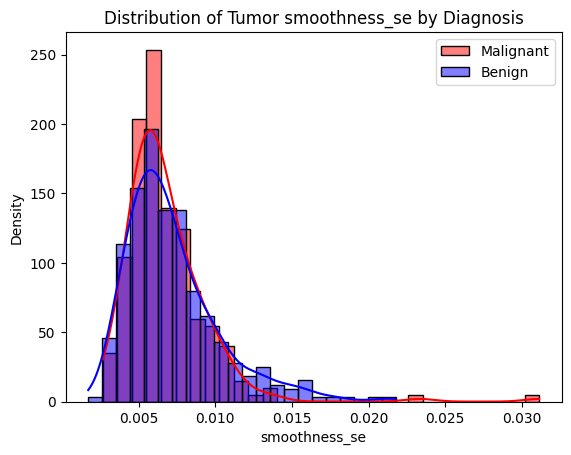

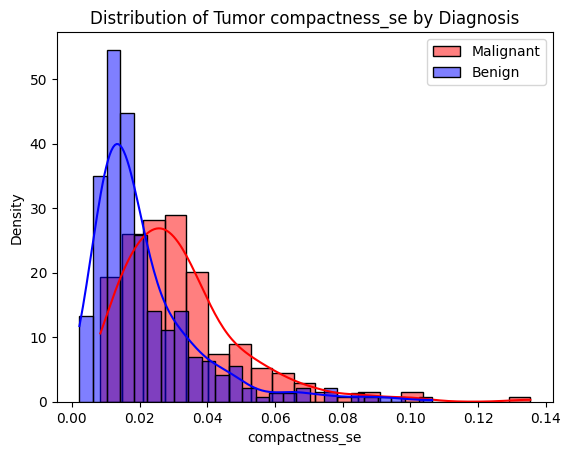

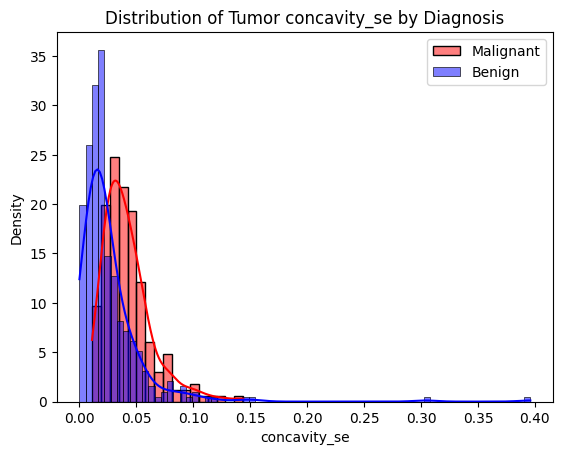

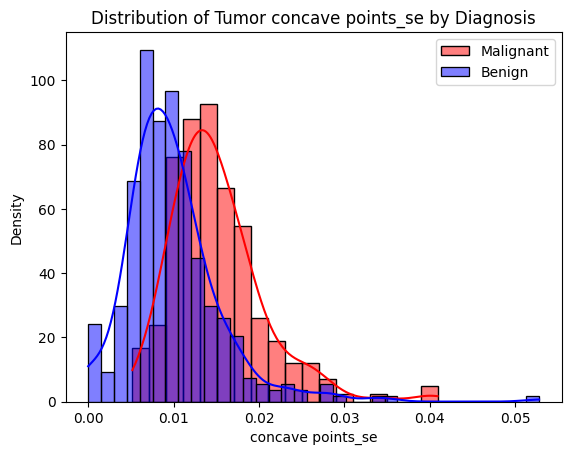

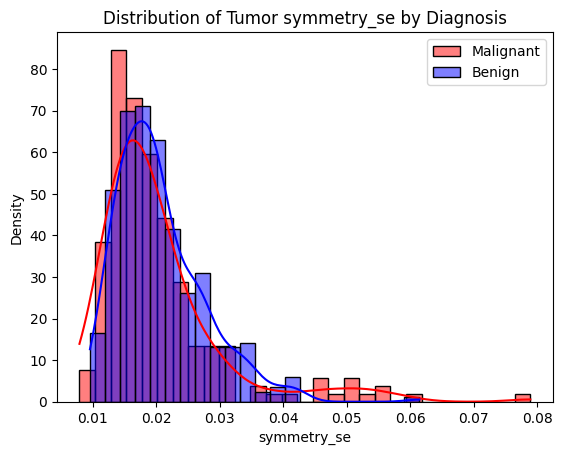

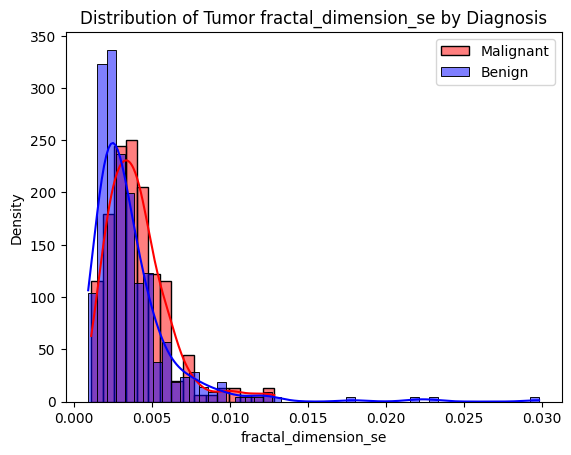

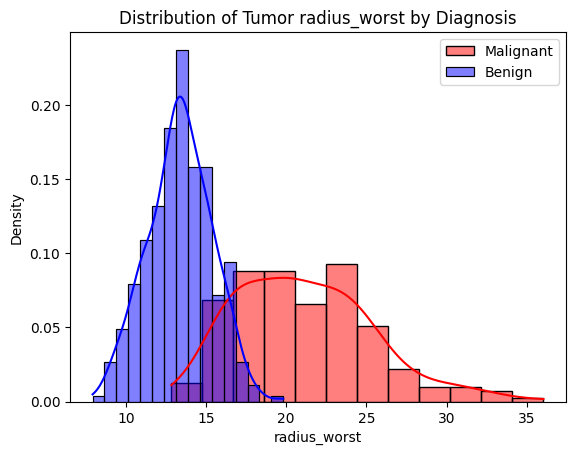

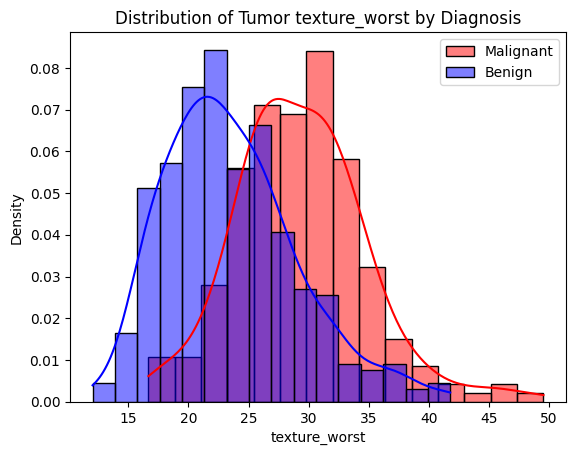

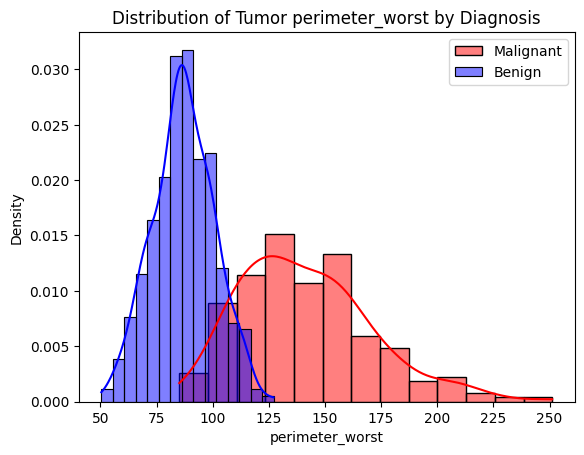

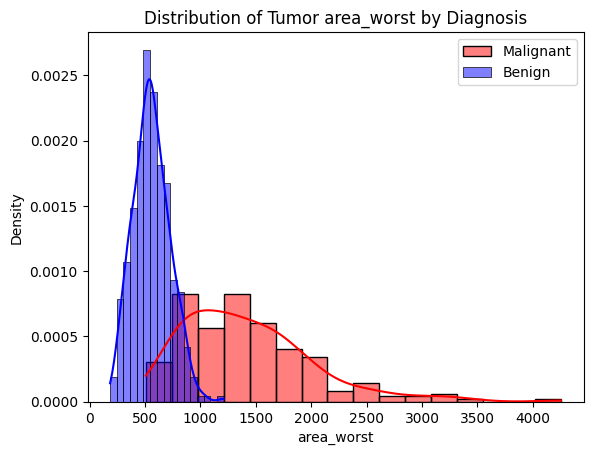

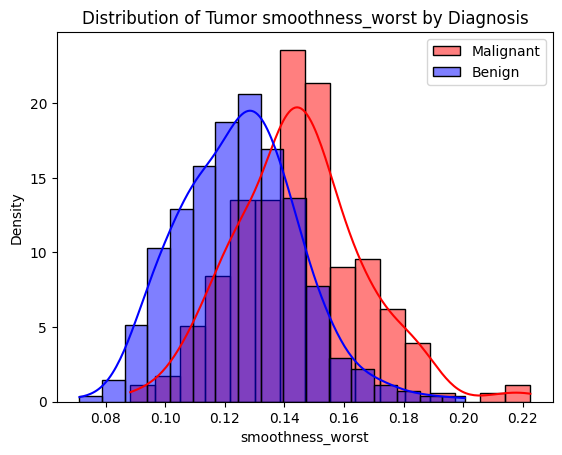

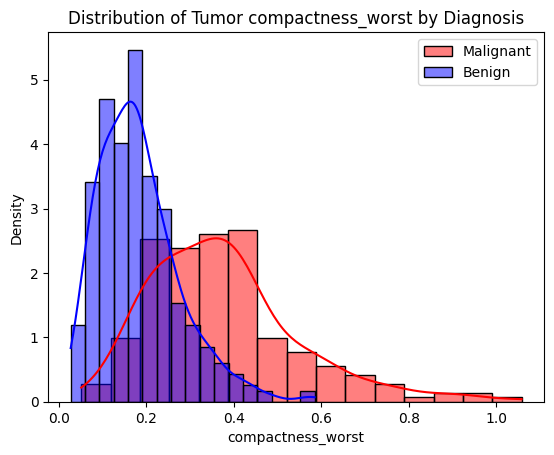

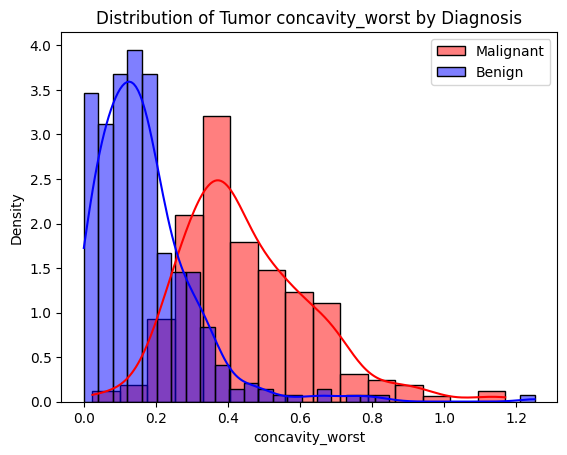

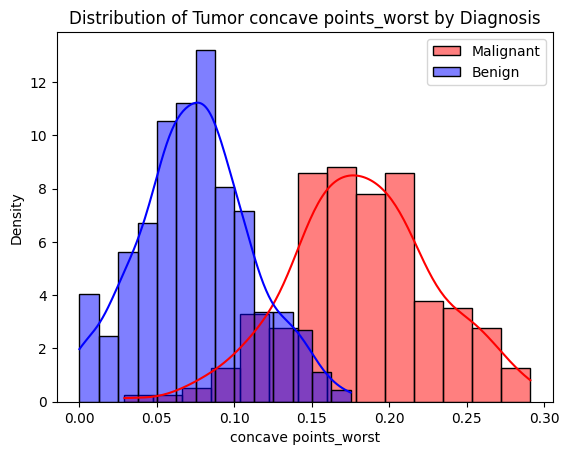

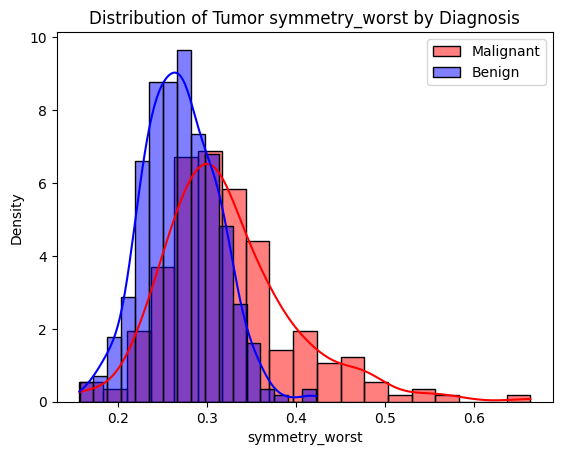

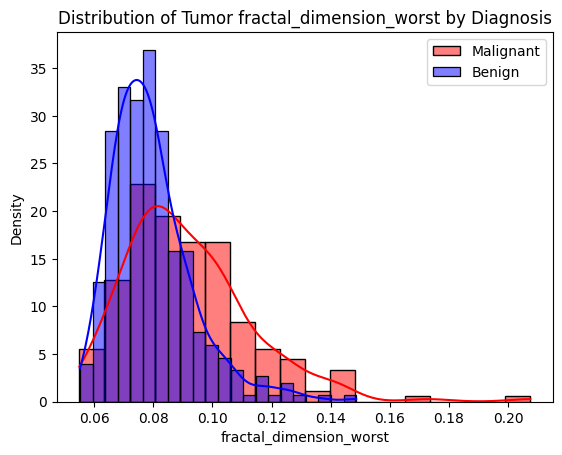

In [14]:
# Функция для построения гистограммы
def plot_histogram(group, feature, label, color):
    sns.histplot(group[feature], color=color, label=label, stat='density', kde=True)
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.title(f'Distribution of Tumor {feature} by Diagnosis')
    plt.legend()
    
    

# Построение гистограмм для каждой группы и каждого признака
for feature in dataset.columns:
    if feature not in ['diagnosis', 'id']:
        plot_histogram(malignant, feature, 'Malignant', 'red')
        plot_histogram(benign, feature, 'Benign', 'blue')
        plt.show()


### 4.
Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

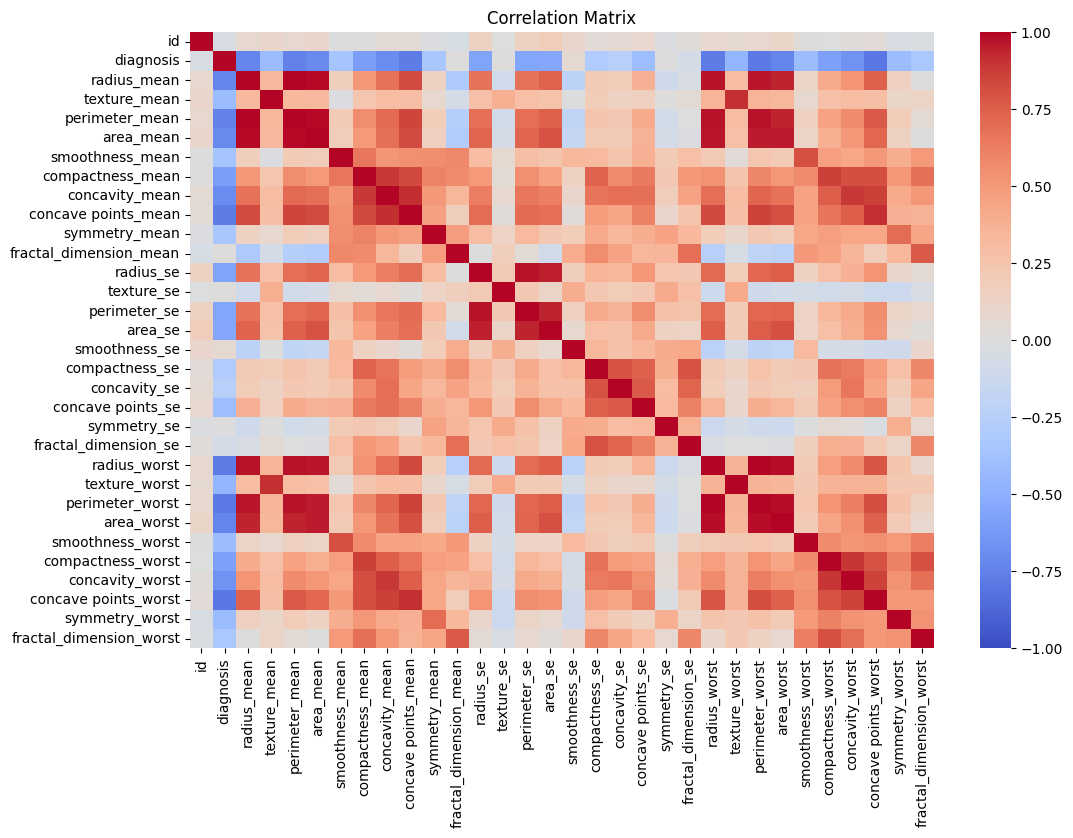

In [16]:
# Создание матрицы корреляций
correlation_matrix = dataset.corr()

# Построение Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [17]:
m = 10
corr_10 = dataset.corr()
collums = corr_10.nlargest(m, 'diagnosis')['diagnosis'].index.tolist()
collums

['diagnosis',
 'smoothness_se',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se',
 'id',
 'fractal_dimension_se',
 'concavity_se',
 'compactness_se',
 'fractal_dimension_worst']

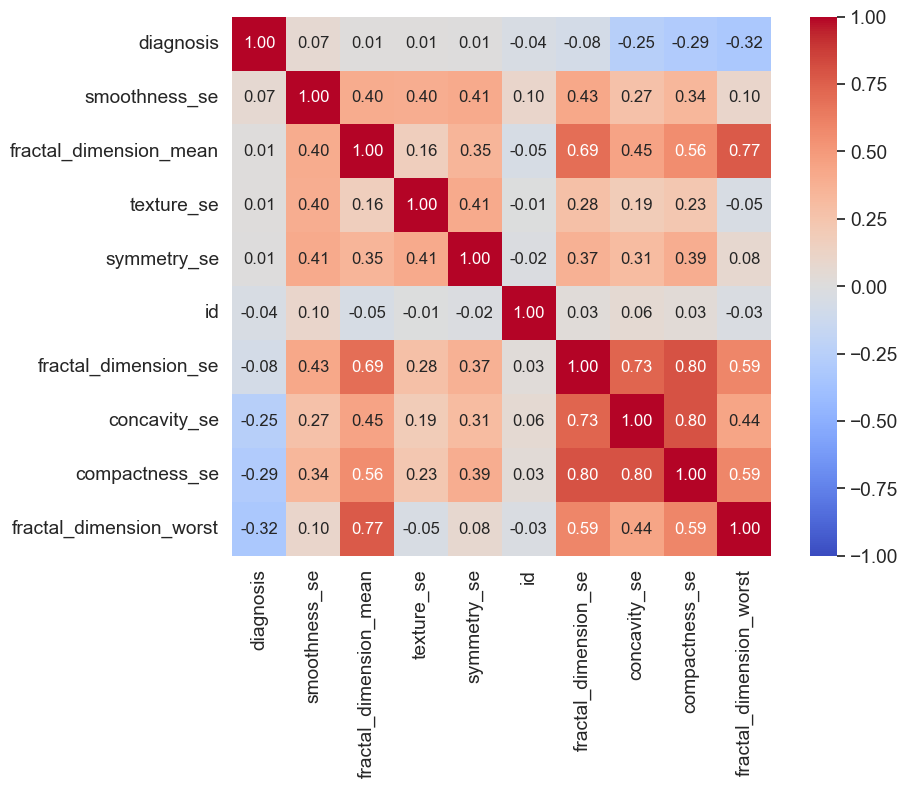

In [18]:
cm = np.corrcoef(dataset[collums].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(
    cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
    yticklabels=collums, xticklabels=collums, vmin=-1, center=0,
    cmap=sns.color_palette('coolwarm',1000)
)
plt.show()

### 5.
Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

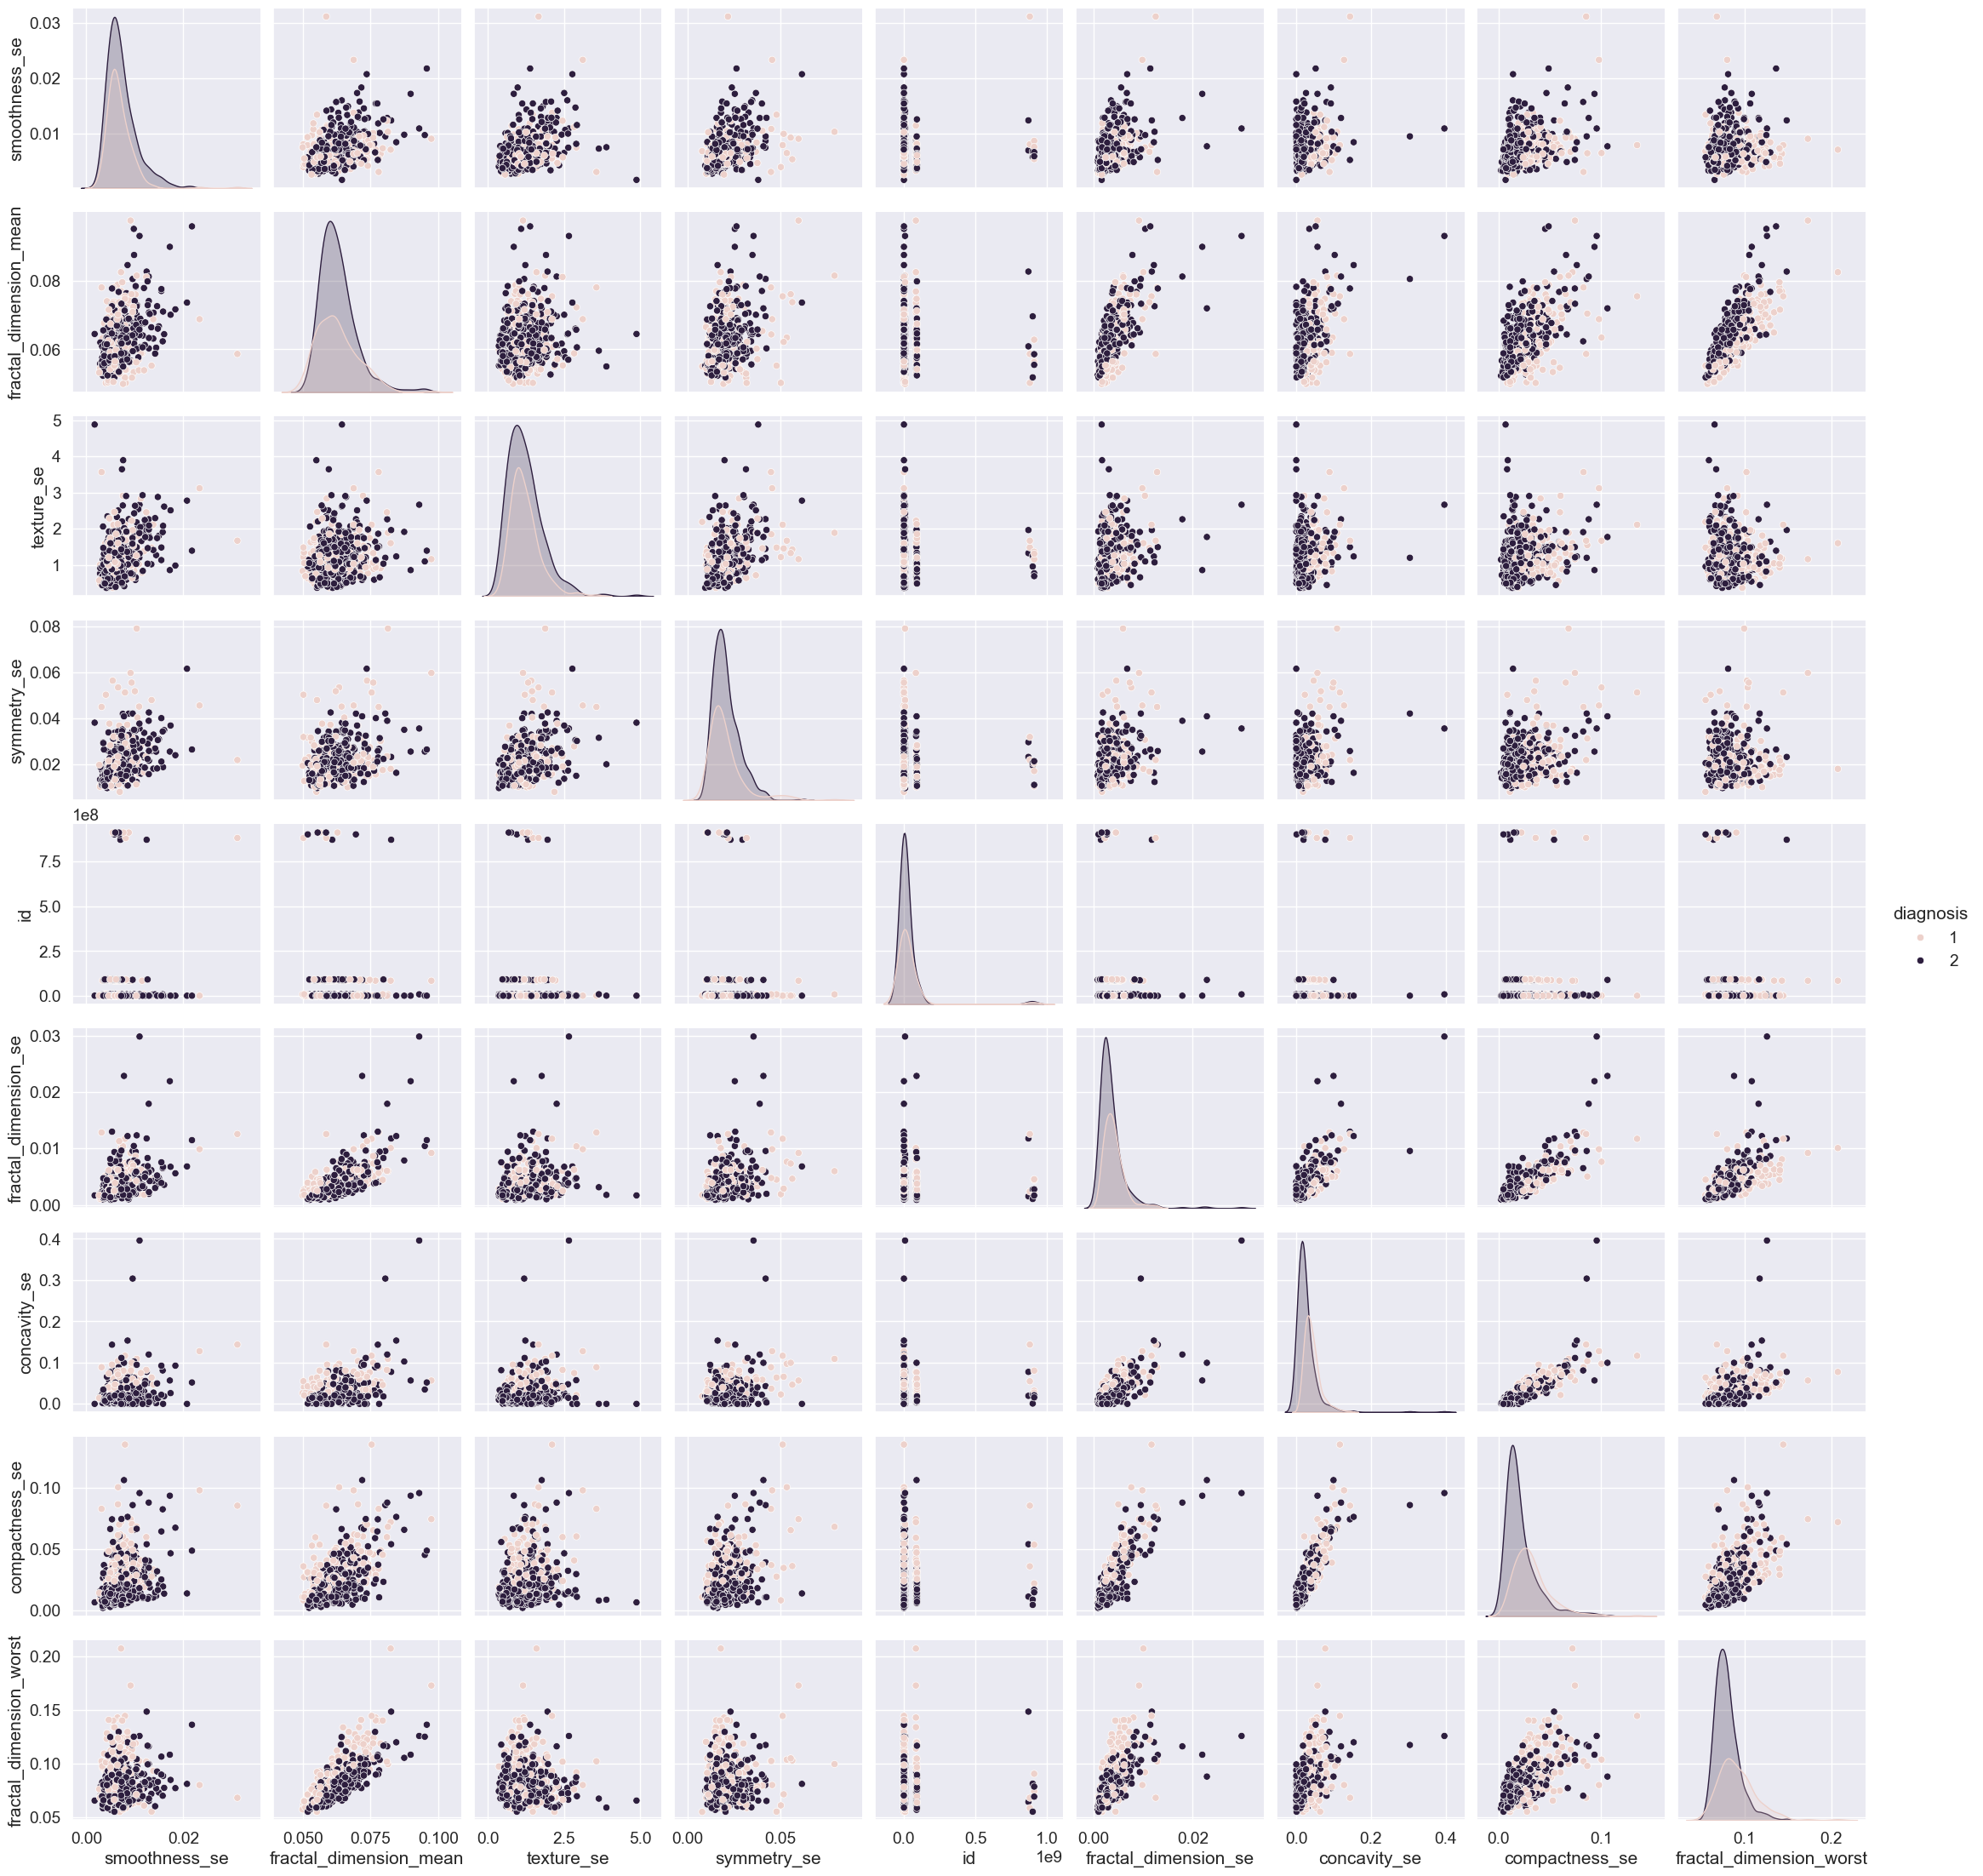

In [19]:
sns.pairplot(data=dataset[collums], hue='diagnosis')
plt.show()

линейная зависимость не наблюдается 

### 6.
Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

Для отделения злокачественных новообразований от доброкачественных можно рассмотреть следующие признаки на основе boxplots:

'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean' и 'concave points_mean'

In [27]:
# Визуализируем boxplots для каждого признака
feature_list =  [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean'
]

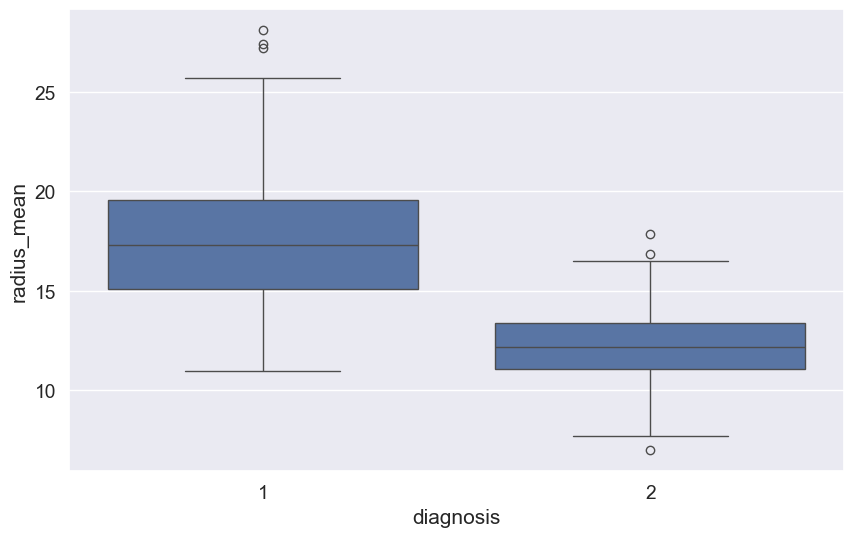

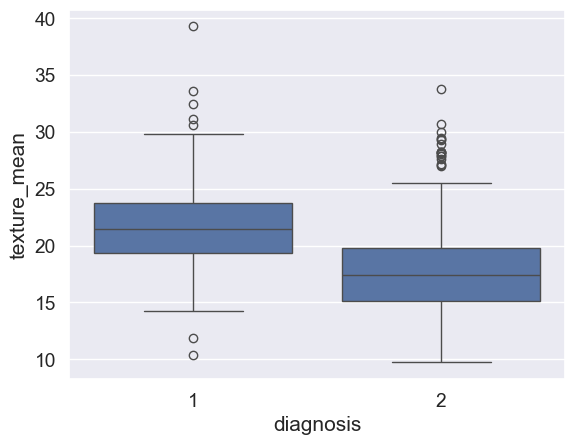

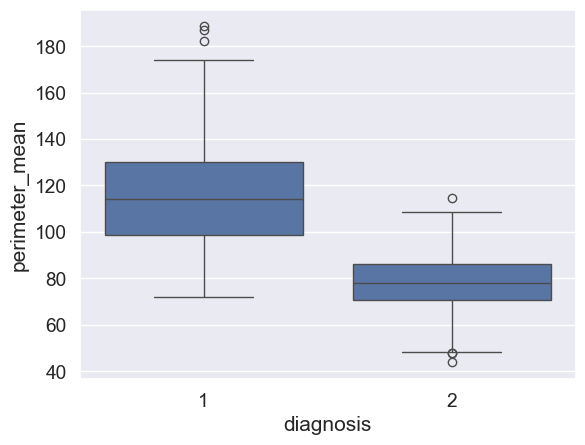

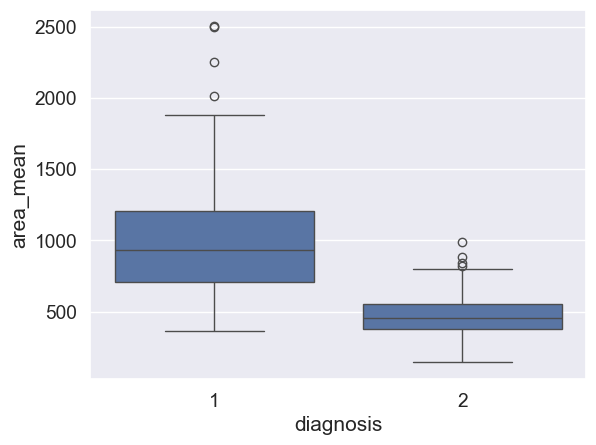

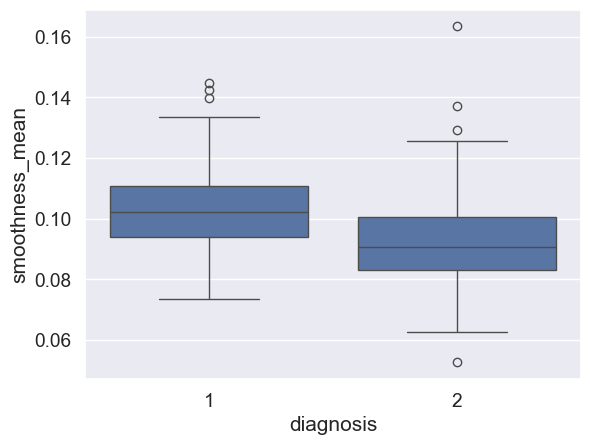

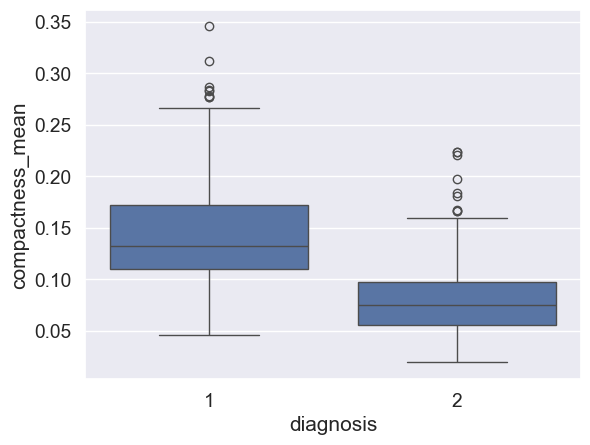

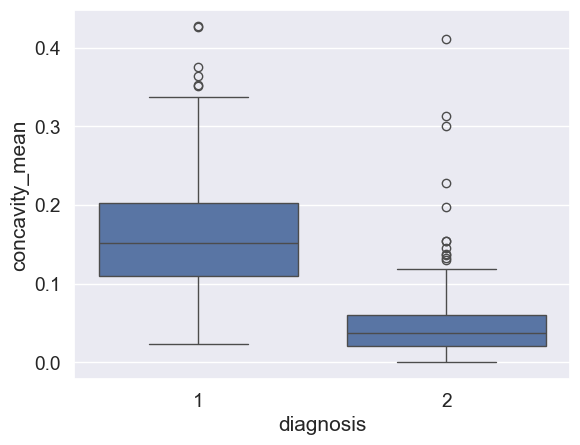

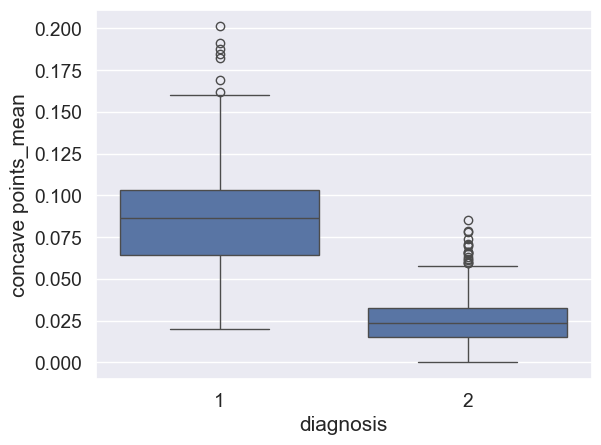

In [35]:
plt.figure(figsize=(10, 6))
for col in feature_list: 
    sns.boxplot(data=dataset, x='diagnosis', y=col)
    plt.show()

Действительно, из boxplots мы можем увидеть, что признаки, которые наиболее явно отличаются между злокачественными и доброкачественными образованиями, это, вероятно, 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity' и 'concave points'. Эти признаки могут быть полезны для разделения злокачественных и доброкачественных образований

### Часть 2. 
#### Моделирование при помощи kNN

Разбейте данные на train-test, отложив 30% выборки для тестирования.

In [46]:
#Для начала разобьем данные на тренировочную и тестовую выборки:

from sklearn.model_selection import train_test_split

X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
#Далее проведем стандартизацию непрерывных переменных:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Стандартизация здесь нужна для того, чтобы привести все переменные к одному масштабу и избежать проблемы несбалансированности весов признаков.

Построим модель kNN "из коробки" без настройки параметров:

Accuracy: 0.9590643274853801
Precision: 0.9516129032258065
Recall: 0.9365079365079365
F1 Score: 0.944
ROC AUC: 0.04563492063492064


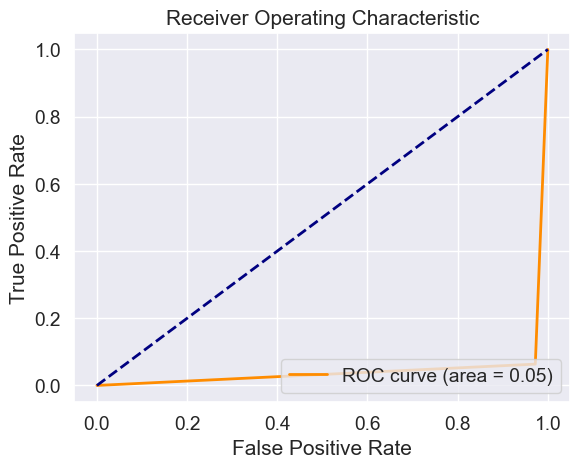

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC:', roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Это позволит нам оценить качество модели по метрикам бинарной классификации 
#(accuracy, precision, recall, f1_score), а также построить ROC-кривую и вычислить площадь под ней (ROC AUC).

Для настройки параметра числа соседей на кросс-валидации можно воспользоваться GridSearchCV из библиотеки scikit-learn. Сначала импортируем необходимые модули и определим диапазон значений числа соседей для поиска наилучшего параметра:

In [50]:
from sklearn.model_selection import GridSearchCV

# Определяем модель kNN
knn = KNeighborsClassifier()

# Определяем диапазон значений числа соседей
param_grid = {'n_neighbors': range(1, 21)}

# Инициализируем GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Обучаем модель на тренировочных данных
grid_search.fit(X_train_scaled, y_train)

# Получаем лучший параметр числа соседей
best_k = grid_search.best_params_['n_neighbors']

# Строим модель с лучшим параметром
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Оцениваем результаты
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_best, pos_label=1)
roc_auc_best = auc(fpr_best, tpr_best)

print('Best number of neighbors:', best_k)
print('Accuracy (best):', accuracy_best)
print('Precision (best):', precision_best)
print('Recall (best):', recall_best)
print('F1 Score (best):', f1_best)
print('ROC AUC (best):', roc_auc_best)


Best number of neighbors: 14
Accuracy (best): 0.9649122807017544
Precision (best): 0.9672131147540983
Recall (best): 0.9365079365079365
F1 Score (best): 0.9516129032258065
ROC AUC (best): 0.04100529100529099


#### предыдущие результаты
Accuracy: 0.9590643274853801

Precision: 0.9516129032258065

Recall: 0.9365079365079365

F1 Score: 0.944

ROC AUC: 0.04563492063492064

После проведения настройки параметра числа соседей и оценки результатов с лучшим параметром модель становится более оптимальной и качество предсказаний улучшается. Score увеличился.